In [9]:
import pandas as pd
from sklearn.datasets import * 

diabetes = load_diabetes()
print(diabetes)

# print(diabetes.DESC)
# print(diabetes.target_names)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  1

In [23]:
X = pd.read_csv('./data.csv', delimiter='\t', engine='python')
print(X)

     Outlook Temperature Humidity    Wind Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No


In [24]:
X['Outlook'] = X['Outlook'].astype('category')
X['Outlook'] = X['Outlook'].cat.codes

X['Temperature'] = X['Temperature'].astype('category')
X['Temperature'] = X['Temperature'].cat.codes

X['Humidity'] = X['Humidity'].astype('category')
X['Humidity'] = X['Humidity'].cat.codes

X['Wind'] = X['Wind'].astype('category')
X['Wind'] = X['Wind'].cat.codes

X['Play'] = X['Play'].astype('category')
X['Play'] = X['Play'].cat.codes

print(X)

    Outlook  Temperature  Humidity  Wind  Play
0         2            1         0     1     0
1         2            1         0     0     0
2         0            1         0     1     1
3         1            2         0     1     1
4         1            0         1     1     1
5         1            0         1     0     0
6         0            0         1     0     1
7         2            2         0     1     0
8         2            0         1     1     1
9         1            2         1     1     1
10        2            2         1     0     1
11        0            2         0     0     1
12        0            1         1     1     1
13        1            2         0     0     0


In [25]:
X = pd.get_dummies(X, prefix=['out', 'temp', 'hum', 'wind'], columns=['Outlook','Temperature', 'Humidity', 'Wind'])
print(X)

    Play  out_0  out_1  out_2  temp_0  temp_1  temp_2  hum_0  hum_1  wind_0  \
0      0      0      0      1       0       1       0      1      0       0   
1      0      0      0      1       0       1       0      1      0       1   
2      1      1      0      0       0       1       0      1      0       0   
3      1      0      1      0       0       0       1      1      0       0   
4      1      0      1      0       1       0       0      0      1       0   
5      0      0      1      0       1       0       0      0      1       1   
6      1      1      0      0       1       0       0      0      1       1   
7      0      0      0      1       0       0       1      1      0       0   
8      1      0      0      1       1       0       0      0      1       0   
9      1      0      1      0       0       0       1      0      1       0   
10     1      0      0      1       0       0       1      0      1       1   
11     1      1      0      0       0       0       

In [16]:
y = X['Play']
del X['Play']

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

/home/com/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


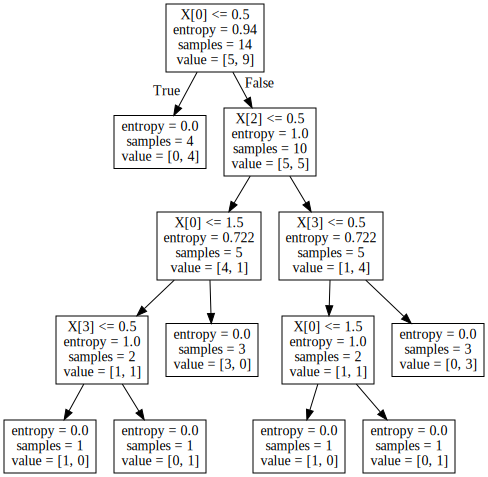

In [20]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(clf) 
# Source(export_graphviz(clf, out_file=None, feature_names=digits.feature_names))
Source(export_graphviz(clf, out_file=None))

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
t = le.fit_transform(['london', 'paris', 'moscow', 'paris'])
print(t)

[0 2 1 2]
